#Training a Multilayer Perceptron with MNIST dataset

In [ ]:
import torch

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

In [ ]:
trainset = datasets.MNIST('data/', download=True, transform=transform, train = True)
valset = datasets.MNIST('data/', download=True, transform=transform, train = False)

In [ ]:
print("Length of training set", len(trainset))
print("Length of training set", len(valset))

Length of training set 60000
Length of training set 10000


In [ ]:
len(valset[0])

2

In [ ]:
valset[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [ ]:
type(valset[0][0]) , type(valset[0][1])

(torch.Tensor, int)

In [ ]:
valset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
valset[0][0].squeeze().shape

torch.Size([28, 28])

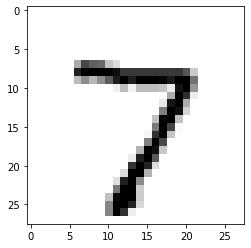

In [ ]:
plt.imshow(valset[0][0].squeeze(), cmap="gray_r")

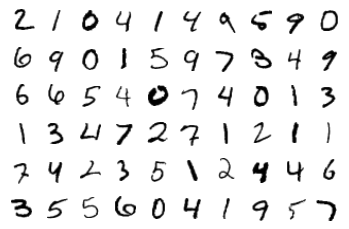

In [ ]:
#printing all datasets
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
  plt.subplot(6, 10, index)
  plt.axis('off')
  plt.imshow(valset[index][0].squeeze(), cmap = 'gray_r')

Model

In [ ]:
 from torch import nn

In [ ]:
class MyAwesomeModel(nn.Module):
  def __init__(self):
   super().__init__()

   self.linear1 = nn.Linear(784, 200)
   self.linear2 = nn.Linear(200, 64)
   self.linear3 = nn.Linear(64, 10)

   self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    z2 = self.linear1(x)
    a2 = nn.Sigmoid()(z2)

    z3 = self.linear2(a2)
    a3 = nn.Sigmoid()(z3)


    out = self.linear3(a3)
    out = self.softmax(out)

    return out
    

In [ ]:
model = MyAwesomeModel()

In [ ]:
valset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
valset[0][0].view(-1).shape

torch.Size([784])

In [ ]:
testImage = valset[0][0].view(-1).unsqueeze(0)

testImage.shape

torch.Size([1, 784])

In [ ]:
output = model(testImage)

output

tensor([[0.1074, 0.0708, 0.0982, 0.1128, 0.0674, 0.1230, 0.1846, 0.0638, 0.0764,
         0.0955]], grad_fn=<SoftmaxBackward0>)

In [ ]:
output.shape

torch.Size([1, 10])

In [ ]:
torch.sum(output)

tensor(1.0000, grad_fn=<SumBackward0>)

In [ ]:
valset[0][1]

7

## Training

In [ ]:
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
NUM_EPOCHS = 35
BATCH_SIZE = 64



In [ ]:
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE)
valloader = DataLoader(valset, batch_size = BATCH_SIZE)

In [ ]:
def evaluate(dataloader):
  total_data = 0
  total_correct = 0

  for images, labels in tqdm(dataloader):
    # Initial: 64, 1. 28, 28   Shape: 64, 784
    images = images.view(images.shape[0], -1)

    output = model(images)

    predictions = torch.argmax(output, dim=1)

    total_correct += torch.sum(predictions == labels)
    total_data +=len(images)

  print("Accuracy: " ,total_correct.item()/total_data) 


In [ ]:
evaluate(valloader)

100%|██████████| 157/157 [00:01<00:00, 90.73it/s]

Accuracy:  0.0958


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.85) 

In [ ]:
for epoch in range(NUM_EPOCHS):
  with tqdm(total=len(trainloader)) as pbar:
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)

      optimizer.zero_grad()

      output = model(images)

      loss = loss_fn(output, labels)

      loss.backward()
      optimizer.step()

      pbar.set_description('epoch: %d, loss: %6f' \
                           %(epoch,loss))
      pbar.update(1)

  evaluate(valloader)


100%|██████████| 157/157 [00:01<00:00, 91.29it/s]


Accuracy:  0.6608


100%|██████████| 157/157 [00:01<00:00, 82.31it/s]


Accuracy:  0.7493


100%|██████████| 157/157 [00:01<00:00, 92.81it/s]


Accuracy:  0.759


100%|██████████| 157/157 [00:01<00:00, 87.41it/s]


Accuracy:  0.7647


100%|██████████| 157/157 [00:01<00:00, 85.59it/s]


Accuracy:  0.8558


100%|██████████| 157/157 [00:01<00:00, 87.09it/s]


Accuracy:  0.9322


100%|██████████| 157/157 [00:01<00:00, 84.85it/s]


Accuracy:  0.9431


100%|██████████| 157/157 [00:01<00:00, 92.88it/s]


Accuracy:  0.9499


100%|██████████| 157/157 [00:01<00:00, 93.10it/s]


Accuracy:  0.956


100%|██████████| 157/157 [00:01<00:00, 94.00it/s]


Accuracy:  0.9585


100%|██████████| 157/157 [00:01<00:00, 92.25it/s]


Accuracy:  0.9627


100%|██████████| 157/157 [00:01<00:00, 93.27it/s]


Accuracy:  0.9649


100%|██████████| 157/157 [00:01<00:00, 91.97it/s]


Accuracy:  0.9664


100%|██████████| 157/157 [00:01<00:00, 82.54it/s]


Accuracy:  0.9687


100%|██████████| 157/157 [00:01<00:00, 86.49it/s]


Accuracy:  0.9697


100%|██████████| 157/157 [00:01<00:00, 90.09it/s]


Accuracy:  0.9704


100%|██████████| 157/157 [00:01<00:00, 91.36it/s]


Accuracy:  0.9714


100%|██████████| 157/157 [00:01<00:00, 91.84it/s]


Accuracy:  0.9701


100%|██████████| 157/157 [00:01<00:00, 95.30it/s]


Accuracy:  0.9694


100%|██████████| 157/157 [00:01<00:00, 92.11it/s]


Accuracy:  0.9718


100%|██████████| 157/157 [00:01<00:00, 91.33it/s]


Accuracy:  0.9744


100%|██████████| 157/157 [00:01<00:00, 93.15it/s]


Accuracy:  0.9747


100%|██████████| 157/157 [00:01<00:00, 91.11it/s]


Accuracy:  0.9743


100%|██████████| 157/157 [00:01<00:00, 91.82it/s]


Accuracy:  0.9746


100%|██████████| 157/157 [00:01<00:00, 92.72it/s]


Accuracy:  0.973


100%|██████████| 157/157 [00:01<00:00, 90.98it/s]


Accuracy:  0.9753


100%|██████████| 157/157 [00:01<00:00, 87.34it/s]


Accuracy:  0.9744


100%|██████████| 157/157 [00:01<00:00, 91.69it/s]


Accuracy:  0.9749


100%|██████████| 157/157 [00:01<00:00, 92.45it/s]


Accuracy:  0.9755


100%|██████████| 157/157 [00:01<00:00, 91.61it/s]


Accuracy:  0.9748


100%|██████████| 157/157 [00:01<00:00, 92.92it/s]


Accuracy:  0.9752


100%|██████████| 157/157 [00:01<00:00, 88.90it/s]


Accuracy:  0.9752


100%|██████████| 157/157 [00:01<00:00, 85.73it/s]


Accuracy:  0.9755


100%|██████████| 157/157 [00:01<00:00, 92.16it/s]


Accuracy:  0.9746


100%|██████████| 157/157 [00:01<00:00, 92.01it/s]

Accuracy:  0.9755


## Inference

In [ ]:
testImage.shape

torch.Size([1, 784])

In [ ]:
output= model(testImage)
output

tensor([[6.6318e-12, 3.6062e-10, 2.8625e-09, 4.6607e-09, 2.1679e-13, 4.0950e-11,
         1.6421e-18, 1.0000e+00, 7.3428e-13, 1.3201e-08]],
       grad_fn=<SoftmaxBackward0>)